In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
data_x = np.linspace(-10.0, 10.0, 100)[:, np.newaxis]
data_y = np.sin(data_x) + 0.1 * np.power(data_x, 2) + 0.5 * np.random.randn(100, 1)
# data_y = 29*data_x + 20* np.random.randn(100, 1)  # creating your data
data_x /= np.max(data_x) #scaling
data_x

array([[-1.        ],
       [-0.97979798],
       [-0.95959596],
       [-0.93939394],
       [-0.91919192],
       [-0.8989899 ],
       [-0.87878788],
       [-0.85858586],
       [-0.83838384],
       [-0.81818182],
       [-0.7979798 ],
       [-0.77777778],
       [-0.75757576],
       [-0.73737374],
       [-0.71717172],
       [-0.6969697 ],
       [-0.67676768],
       [-0.65656566],
       [-0.63636364],
       [-0.61616162],
       [-0.5959596 ],
       [-0.57575758],
       [-0.55555556],
       [-0.53535354],
       [-0.51515152],
       [-0.49494949],
       [-0.47474747],
       [-0.45454545],
       [-0.43434343],
       [-0.41414141],
       [-0.39393939],
       [-0.37373737],
       [-0.35353535],
       [-0.33333333],
       [-0.31313131],
       [-0.29292929],
       [-0.27272727],
       [-0.25252525],
       [-0.23232323],
       [-0.21212121],
       [-0.19191919],
       [-0.17171717],
       [-0.15151515],
       [-0.13131313],
       [-0.11111111],
       [-0

In [3]:
data_x = np.hstack((np.ones_like(data_x), data_x))
data_x # horizontal stacking because y_hat = theta1*x1 + theta0*x0 => here taking x0 = 1

array([[ 1.        , -1.        ],
       [ 1.        , -0.97979798],
       [ 1.        , -0.95959596],
       [ 1.        , -0.93939394],
       [ 1.        , -0.91919192],
       [ 1.        , -0.8989899 ],
       [ 1.        , -0.87878788],
       [ 1.        , -0.85858586],
       [ 1.        , -0.83838384],
       [ 1.        , -0.81818182],
       [ 1.        , -0.7979798 ],
       [ 1.        , -0.77777778],
       [ 1.        , -0.75757576],
       [ 1.        , -0.73737374],
       [ 1.        , -0.71717172],
       [ 1.        , -0.6969697 ],
       [ 1.        , -0.67676768],
       [ 1.        , -0.65656566],
       [ 1.        , -0.63636364],
       [ 1.        , -0.61616162],
       [ 1.        , -0.5959596 ],
       [ 1.        , -0.57575758],
       [ 1.        , -0.55555556],
       [ 1.        , -0.53535354],
       [ 1.        , -0.51515152],
       [ 1.        , -0.49494949],
       [ 1.        , -0.47474747],
       [ 1.        , -0.45454545],
       [ 1.        ,

In [4]:
order = np.random.permutation(len(data_x))
portion = 20
test_x = data_x[order[:portion]]
test_y = data_y[order[:portion]]
train_x = data_x[order[portion:]]
train_y = data_y[order[portion:]]
print(order)
print (test_x.shape, train_x.size, test_y.size, train_y.size)
print (test_x)

[30 56 13 41  7 20 95  3 48 14 79 12 59 26 34 89 39 60 84 63 45 73 64 40
 71 49 83 42  9 29 22 97 24 27 65 75 17 72  6 68 46 44 66 25 74 35 19 81
 28 76 86 99 32 15 47 10 21  5 33 85  4 93 37 62 16 80 54 67 70 69 90 94
 52 77 18  0 53 92 82 91 55  2  1 38 11 88 57 98 51 87 31 58 78 23 43 50
 96 36 61  8]
(20, 2) 160 20 80
[[ 1.         -0.39393939]
 [ 1.          0.13131313]
 [ 1.         -0.73737374]
 [ 1.         -0.17171717]
 [ 1.         -0.85858586]
 [ 1.         -0.5959596 ]
 [ 1.          0.91919192]
 [ 1.         -0.93939394]
 [ 1.         -0.03030303]
 [ 1.         -0.71717172]
 [ 1.          0.5959596 ]
 [ 1.         -0.75757576]
 [ 1.          0.19191919]
 [ 1.         -0.47474747]
 [ 1.         -0.31313131]
 [ 1.          0.7979798 ]
 [ 1.         -0.21212121]
 [ 1.          0.21212121]
 [ 1.          0.6969697 ]
 [ 1.          0.27272727]]


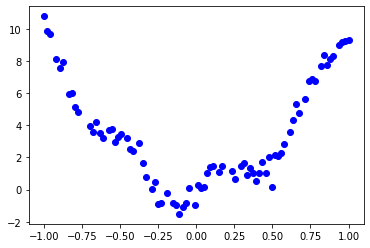

In [5]:
plt.scatter(train_x[:,1], train_y, c='b', label='Data')
plt.show()

In [6]:
def get_gradient(w, x, y):
    y_estimate = (np.power(x,2).dot(w)).flatten() #hypothesis
    error = (y_estimate - y.flatten()) 
    mse = (1.0/len(x))*np.sum(np.power(error,2)) # mse
    gradient = (1.0/len(x)) * error.dot(np.power(x,2))         # gradient
    return gradient, mse

In [7]:
w = np.random.randn(2) # Random Intialization
alpha = 0.1 # learning rate
tolerance = 1e-3 # param for stopping the loop
print("Intial values of Weights:")
print(w[1], w[0])
# Perform Gradient Descent
iterations = 1
while True:
    gradient, error = get_gradient(w, train_x, train_y)
    new_w = w - alpha * gradient
#     print(gradient)
    
    # Stopping Condition
    if np.sum(abs(new_w - w)) < tolerance:
        print ("Converged")
        break
    
    # Print error every 10 iterations
    if iterations % 10 == 0:
        print ("Iteration: %d - Error: %.4f" %(iterations, error))
        print ("Updated Weights : {:f} , {:f}".format(w[1], w[0]))
    iterations += 1
    w = new_w

print ("Final Weights : {:f} , {:f}".format(w[1], w[0]))
print ("Test Cost =", get_gradient(w, test_x, test_y)[1])

Intial values of Weights:
1.1026874654627117 0.6530483110497608
Iteration: 10 - Error: 7.0758
Updated Weights : 2.271717 , 1.948196
Iteration: 20 - Error: 5.4898
Updated Weights : 3.093794 , 2.265742
Iteration: 30 - Error: 4.6920
Updated Weights : 3.723455 , 2.219534
Iteration: 40 - Error: 4.0672
Updated Weights : 4.264233 , 2.074822
Iteration: 50 - Error: 3.5435
Updated Weights : 4.749901 , 1.910870
Iteration: 60 - Error: 3.1013
Updated Weights : 5.192944 , 1.750788
Iteration: 70 - Error: 2.7275
Updated Weights : 5.599229 , 1.600784
Iteration: 80 - Error: 2.4116
Updated Weights : 5.972453 , 1.462014
Iteration: 90 - Error: 2.1445
Updated Weights : 6.315504 , 1.334169
Iteration: 100 - Error: 1.9187
Updated Weights : 6.630879 , 1.216550
Iteration: 110 - Error: 1.7278
Updated Weights : 6.920830 , 1.108385
Iteration: 120 - Error: 1.5665
Updated Weights : 7.187411 , 1.008930
Iteration: 130 - Error: 1.4301
Updated Weights : 7.432508 , 0.917488
Iteration: 140 - Error: 1.3148
Updated Weights :

In [8]:
print("Final eqn / hypothesis looks like:")
print('y = {:f}.x^1 + {:f}'.format(w[1], w[0]))

Final eqn / hypothesis looks like:
y = 10.141734.x^1 + -0.093295


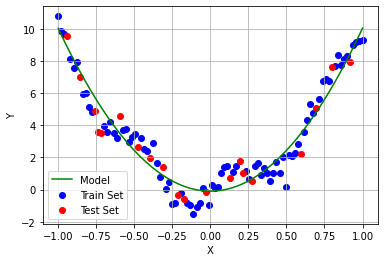

In [10]:
plt.plot(data_x[:,1], (data_x**2).dot(w), c='g', label='Model')
plt.scatter(train_x[:,1], train_y, c='b', label='Train Set')
plt.scatter(test_x[:,1], test_y, c='r', label='Test Set')
plt.grid()
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [24]:
w # trained model contains values of weights/parameters

array([ -1.43111235, 294.07132988])